# Data Collection

In [1]:
import pandas as pd 
df = pd.read_csv(r"C:\Users\mukul\Downloads\diamonds.csv")
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


# Data Understanding

In [2]:
df.shape

(53940, 10)

In [3]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df.tail()

,carat,cut,color,clarity,depth,table,price,x,y,z
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [6]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [7]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [8]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [9]:
df.nunique()

carat        273
cut            5
color          7
clarity        8
depth        184
table        127
price      11602
x            554
y            552
z            375
dtype: int64

In [10]:
df['color'].value_counts()

color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64

In [11]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

# Data Cleaning And Transformation

In [12]:
duplicated_count = df.duplicated().sum()
print(f"Duplicate Rows Found:{duplicated_count}")

if duplicated_count > 0:
    df = df.drop_duplicates()
    print(f"Remove {duplicated_count} Duplicate Rows")

Duplicate Rows Found:146
Remove 146 Duplicate Rows


In [13]:
df.shape

(53794, 10)

# Check Invalid Values in X, Y, Z

In [14]:
print("for X column")
print(f"Zero Values: {(df['x']==0).sum()}")
print(f"negative Values: {(df['x']<0).sum()}")
print(f"Very Small values(<0.1mm): {(df['x']<0.1).sum()}")
print(f"Min Values: {df['x'].min()}")
print(f"Max Values: {df['x'].max()}")


print("\nfor Y column")
print(f"Zero Values: {(df['y']==0).sum()}")
print(f"negative Values: {(df['y']<0).sum()}")
print(f"Very Small values(<0.1mm): {(df['y']<0.1).sum()}")
print(f"Min Values: {df['y'].min()}")
print(f"Max Values: {df['y'].max()}")

print("\nfor Z column")
print(f"Zero Values: {(df['z']==0).sum()}")
print(f"negative Values: {(df['z']<0).sum()}")
print(f"Very Small values(<0.1mm): {(df['z']<0.1).sum()}")
print(f"Min Values: {df['z'].min()}")
print(f"Max Values: {df['z'].max()}")

for X column
Zero Values: 7
negative Values: 0
Very Small values(<0.1mm): 7
Min Values: 0.0
Max Values: 10.74

for Y column
Zero Values: 6
negative Values: 0
Very Small values(<0.1mm): 6
Min Values: 0.0
Max Values: 58.9

for Z column
Zero Values: 19
negative Values: 0
Very Small values(<0.1mm): 19
Min Values: 0.0
Max Values: 31.8


# Outliers Handling:

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt


In [16]:
# Find The Numerical Columns For Outlier
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("All numerical columns:")
print(numerical_cols)

All numerical columns:
['carat', 'depth', 'table', 'price', 'x', 'y', 'z']


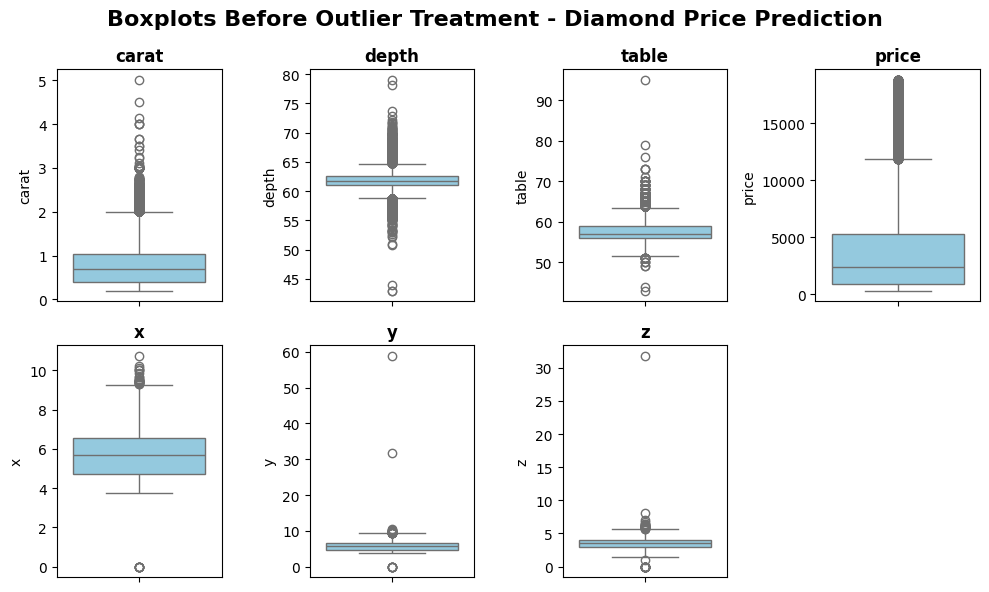

In [17]:
numerical_cols = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']
plt.figure(figsize  = (10,6))
plt.suptitle("Boxplots Before Outlier Treatment - Diamond Price Prediction", fontsize=16, fontweight='bold')
for i,col in enumerate(numerical_cols, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'{col}', fontweight='bold')
    plt.tight_layout()
plt.show()

In [18]:
import numpy as np

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)  # 25th percentile
    Q3 = df[col].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # interquartile range

    # Define lower and upper bound
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

     # Count outliers before treatment
    outliers_before = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()

    print(f"{col}: {outliers_before} outliers before")

    # Outlier capping using clip
    df[col] = df[col].clip(lower_bound, upper_bound)

print("\nOutlier Treatment Completed")

carat: 1873 outliers before
depth: 2525 outliers before
table: 604 outliers before
price: 3523 outliers before
x: 31 outliers before
y: 28 outliers before
z: 48 outliers before

Outlier Treatment Completed


C:\Users\mukul\AppData\Local\Temp\ipykernel_16508\3932569078.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].clip(lower_bound, upper_bound)
C:\Users\mukul\AppData\Local\Temp\ipykernel_16508\3932569078.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].clip(lower_bound, upper_bound)
C:\Users\mukul\AppData\Local\Temp\ipykernel_16508\3932569078.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

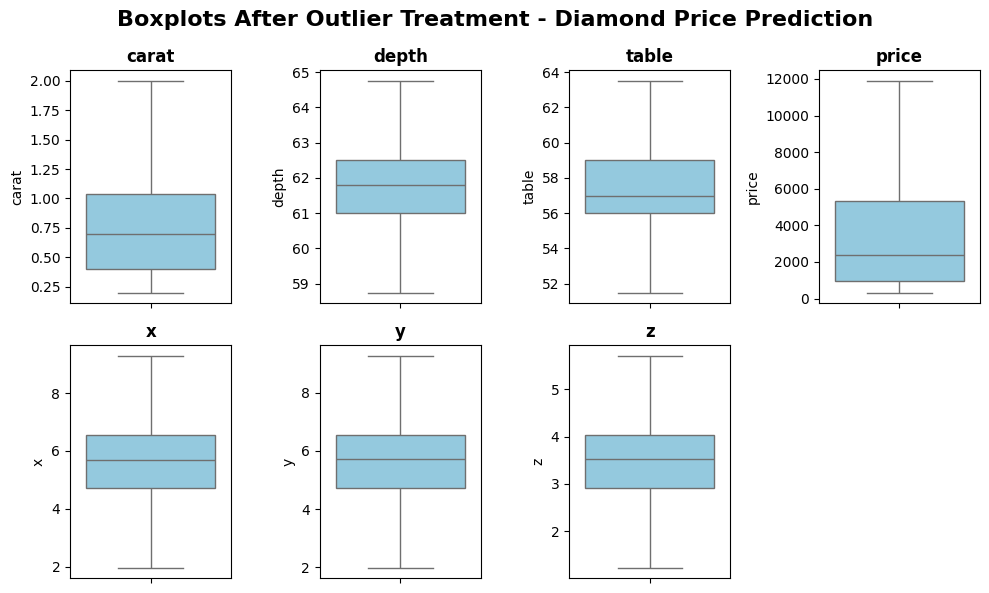

In [19]:
numerical_cols = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']
plt.figure(figsize  = (10,6))
plt.suptitle("Boxplots After Outlier Treatment - Diamond Price Prediction", fontsize=16, fontweight='bold')
for i,col in enumerate(numerical_cols, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'{col}', fontweight='bold')
    plt.tight_layout()
plt.show()

# Skewness Check And Transformation

In [20]:
for col in numerical_cols:
    skew = df[col].skew()
    print(f"Skewness for {col}: {skew}")

    if abs(skew) > 0.8:
        df[col] = np.log1p(df[col])
        print(f"Applied Log Transformation to {col}")

Skewness for carat: 0.8991702338122602
Applied Log Transformation to carat
Skewness for depth: -0.22856333299201326
Skewness for table: 0.47253222081095664
Skewness for price: 1.1486064541189223
Applied Log Transformation to price
Skewness for x: 0.3881851486667978
Skewness for y: 0.38455240035930166
Skewness for z: 0.37284909582649006


C:\Users\mukul\AppData\Local\Temp\ipykernel_16508\3113074784.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = np.log1p(df[col])


In [21]:
for col in numerical_cols:
    skew = df[col].skew()
    print(f"Skewness for {col}: {skew}")

Skewness for carat: 0.49397371435080567
Skewness for depth: -0.22856333299201326
Skewness for table: 0.47253222081095664
Skewness for price: 0.03093167414162132
Skewness for x: 0.3881851486667978
Skewness for y: 0.38455240035930166
Skewness for z: 0.37284909582649006


# Feature Engineering:

In [22]:
print("Starting Feature Engineering")
# 1 USD to INR Conversion
#USD_TO_INR = 83.0
#df['price_inr'] = df['price'] * USD_TO_INR

# 2 Volume
df['volume'] = df['x'] * df['y'] * df['z']

# 3 Price per Carat
df['price_per_carat'] = df['price'] / df['carat']

# 4 Dimension Ratio
df['dimension_ratio'] = (df['x'] + df['y']) / (2 * df['z'])

# 5 Carat Category
def categorize_carat(carat):
    if carat < 0.5: return 'Light'
    elif carat <= 1.5: return 'Medium'
    else: return 'Heavy'

df['carat_category'] = df['carat'].apply(categorize_carat)

# 6 Additional Features
df['density'] = df['carat'] / df['volume']
df['table_depth_ratio'] = df['table'] / df['depth']
df['size_index'] = (df['x'] + df['y'] + df['z']) / 3

df['premium_cut_flag'] = df['cut'].isin(['Ideal', 'Premium']).astype(int)
print("Feature Engineering Completed")
print(f"Total features now: {len(df.columns)}")
print(f"New features: {[col for col in df.columns if col not in ['carat','cut','color','clarity','depth','table','price','x','y','z']]}")

Starting Feature Engineering
Feature Engineering Completed
Total features now: 18
New features: ['volume', 'price_per_carat', 'dimension_ratio', 'carat_category', 'density', 'table_depth_ratio', 'size_index', 'premium_cut_flag']


C:\Users\mukul\AppData\Local\Temp\ipykernel_16508\1626587855.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['volume'] = df['x'] * df['y'] * df['z']
C:\Users\mukul\AppData\Local\Temp\ipykernel_16508\1626587855.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_per_carat'] = df['price'] / df['carat']
C:\Users\mukul\AppData\Local\Temp\ipykernel_16508\1626587855.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

In [23]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z,volume,price_per_carat,dimension_ratio,carat_category,density,table_depth_ratio,size_index,premium_cut_flag
0,0.207014,Ideal,E,SI2,61.50,55.0,5.789960,3.95,3.98,2.43,38.202030,27.968908,1.631687,Light,0.005419,0.894309,3.453333,1
1,0.190620,Premium,E,SI1,59.80,61.0,5.789960,3.89,3.84,2.31,34.505856,30.374301,1.673160,Light,0.005524,1.020067,3.346667,1
2,0.207014,Good,E,VS1,58.75,63.5,5.793014,4.05,4.07,2.31,38.076885,27.983657,1.757576,Light,0.005437,1.080851,3.476667,0
3,0.254642,Premium,I,VS2,62.40,58.0,5.814131,4.20,4.23,2.63,46.724580,22.832547,1.602662,Light,0.005450,0.929487,3.686667,1
4,0.270027,Good,J,SI2,63.30,58.0,5.817111,4.34,4.35,2.75,51.917250,21.542691,1.580000,Light,0.005201,0.916272,3.813333,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.542324,Ideal,D,SI1,60.80,57.0,7.922261,5.75,5.76,3.50,115.920000,14.607978,1.644286,Medium,0.004678,0.937500,5.003333,1
53936,0.542324,Good,D,SI1,63.10,55.0,7.922261,5.69,5.75,3.61,118.110175,14.607978,1.584488,Medium,0.004592,0.871632,5.016667,0
53937,0.530628,Very Good,D,SI1,62.80,60.0,7.922261,5.66,5.68,3.56,114.449728,14.929965,1.592697,Medium,0.004636,0.955414,4.966667,0
53938,0.620576,Premium,H,SI2,61.00,58.0,7.922261,6.15,6.12,3.74,140.766120,12.765970,1.640374,Medium,0.004409,0.950820,5.336667,1


In [24]:
df.shape

(53794, 18)

# Exploratory Datat Analysis(EDA)

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_style("whitegrid")

Distribution Plots for Numerical Features


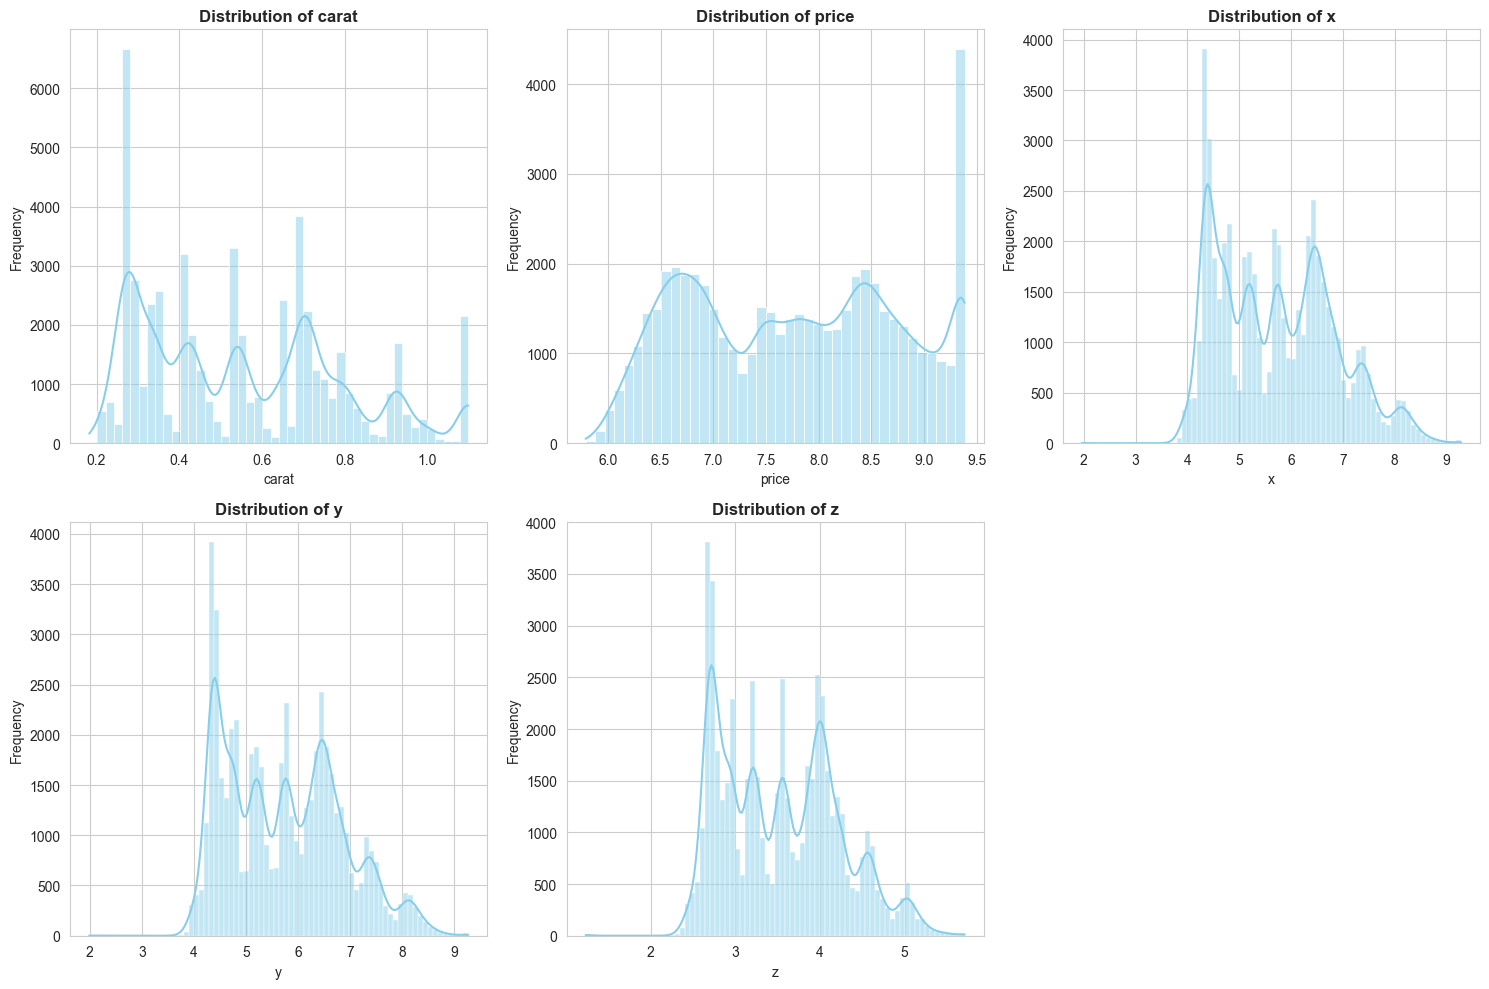

In [26]:
print("Distribution Plots for Numerical Features")
numerical_cols = ['carat', 'price', 'x', 'y', 'z']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}', fontweight='bold')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Count Plots for Categorical Features


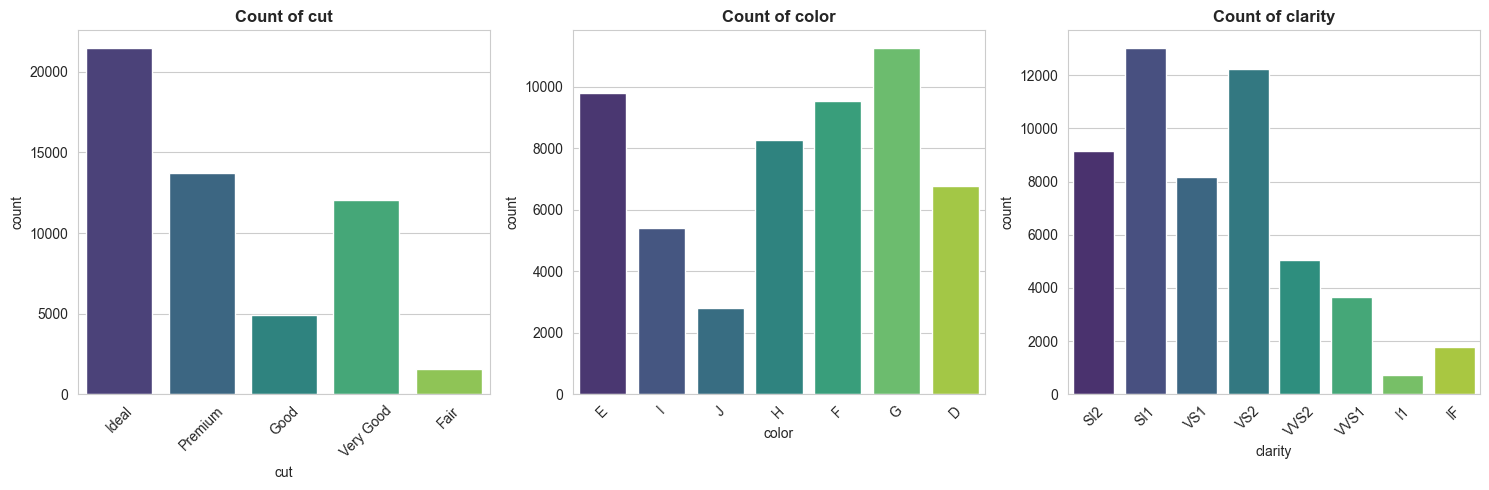

In [27]:
print("Count Plots for Categorical Features")
categorical_cols = ['cut', 'color', 'clarity']

plt.figure(figsize=(15, 5))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(1, 3, i)
    sns.countplot(data=df, x=col, hue=col, palette='viridis', legend=False)  
    plt.title(f'Count of {col}', fontweight='bold')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Price Variation with Categorical Features


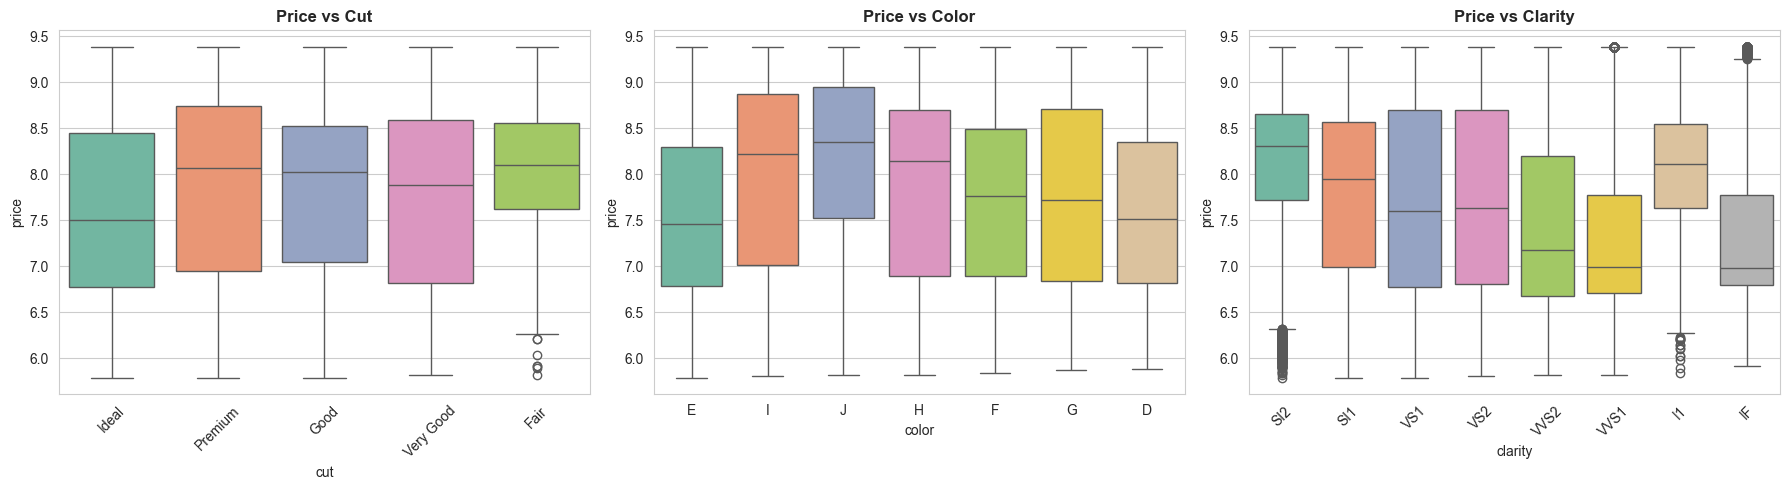

In [28]:
print("Price Variation with Categorical Features")
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data=df, x='cut', y='price', hue='cut', palette='Set2', legend=False)  
plt.title('Price vs Cut', fontweight='bold')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
sns.boxplot(data=df, x='color', y='price', hue='color', palette='Set2', legend=False)  
plt.title('Price vs Color', fontweight='bold')

plt.subplot(1, 3, 3)
sns.boxplot(data=df, x='clarity', y='price', hue='clarity', palette='Set2', legend=False)  
plt.title('Price vs Clarity', fontweight='bold')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Correlation Heatmap


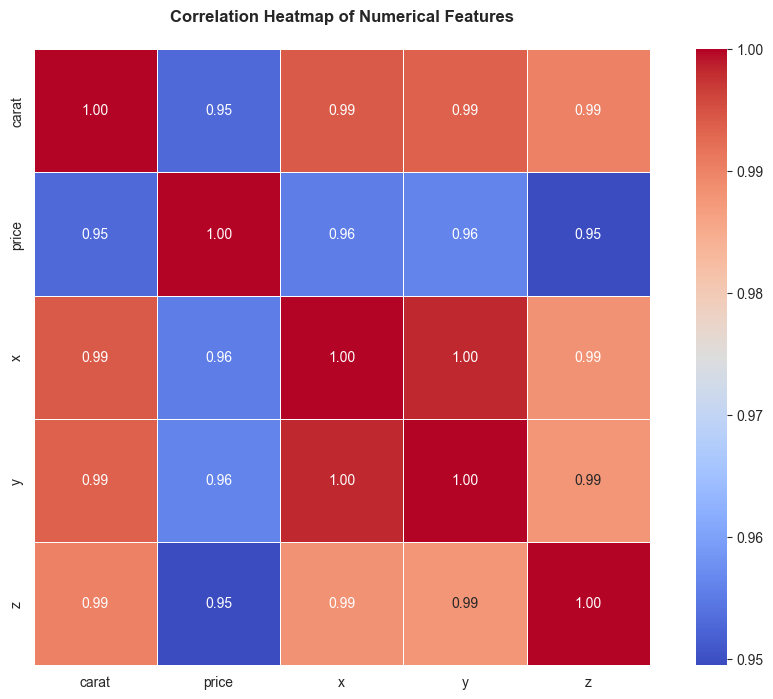

In [30]:
print("Correlation Heatmap")
plt.figure(figsize=(12, 8))

corr_matrix = df[numerical_cols].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', 
            square=True, fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features', fontweight='bold', pad=20)
plt.show()

In [31]:
df.drop(columns=['depth','table'], axis = 1, inplace = True)

C:\Users\mukul\AppData\Local\Temp\ipykernel_16508\443844705.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['depth','table'], axis = 1, inplace = True)


Scatterplot Matrix


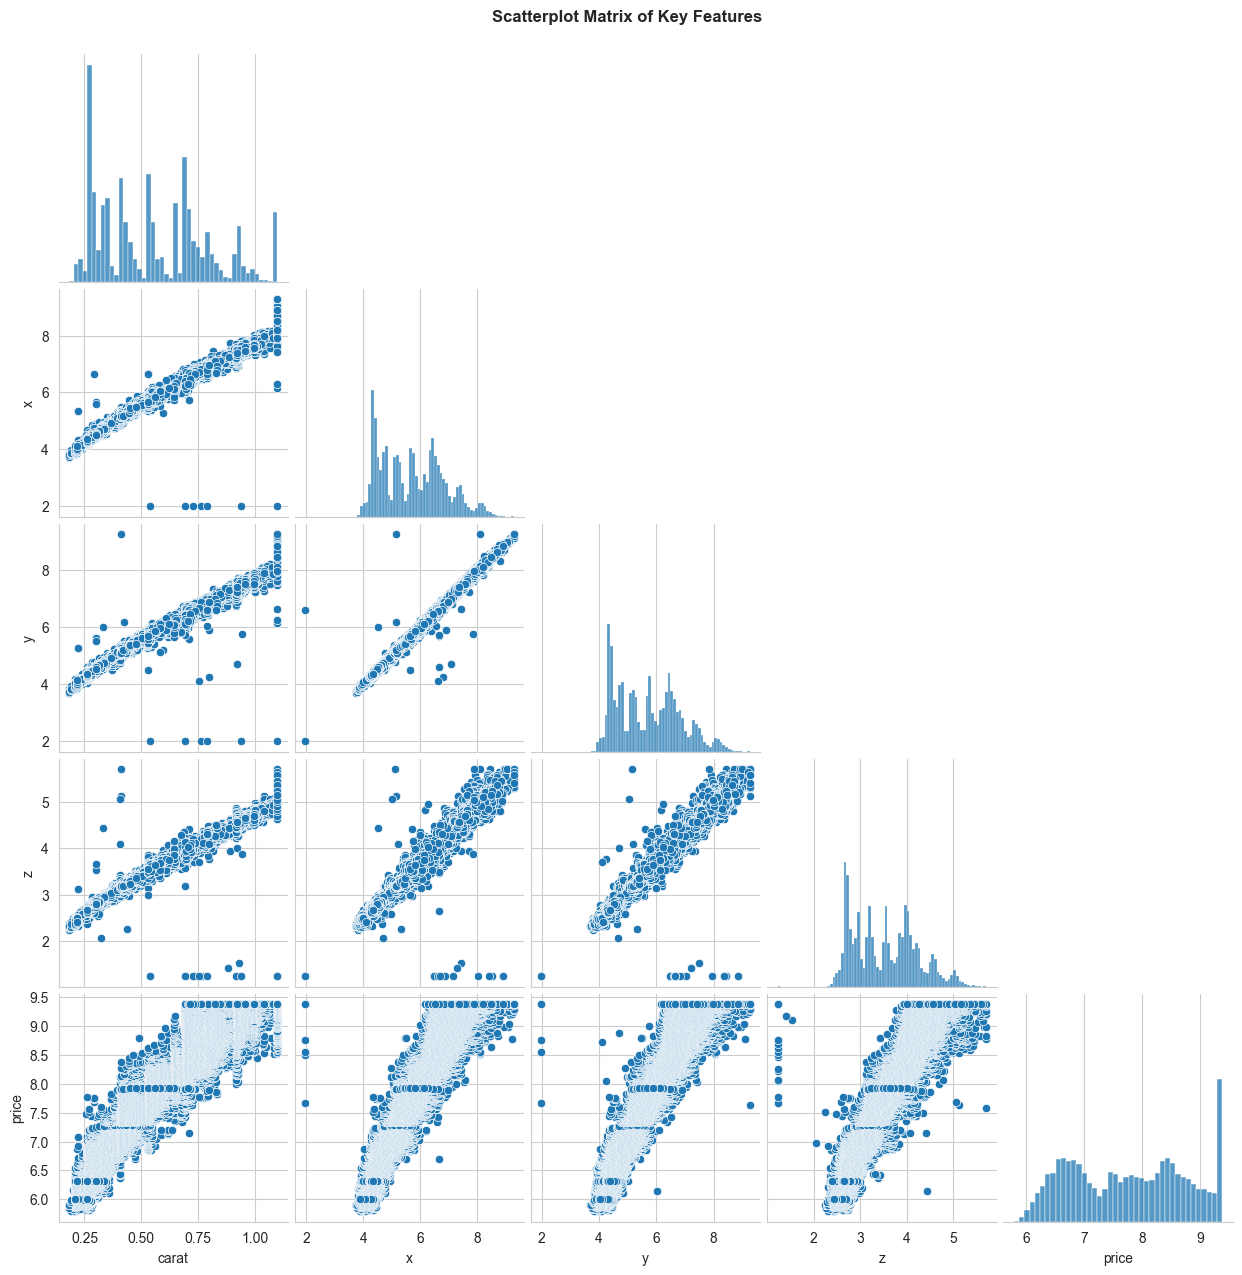

In [32]:
print("Scatterplot Matrix")
scatter_cols = ['carat', 'x', 'y', 'z', 'price']
sns.pairplot(df[scatter_cols], diag_kind='hist', corner=True)
plt.suptitle('Scatterplot Matrix of Key Features', y=1.02, fontweight='bold')
plt.show()

Pairwise Relationships


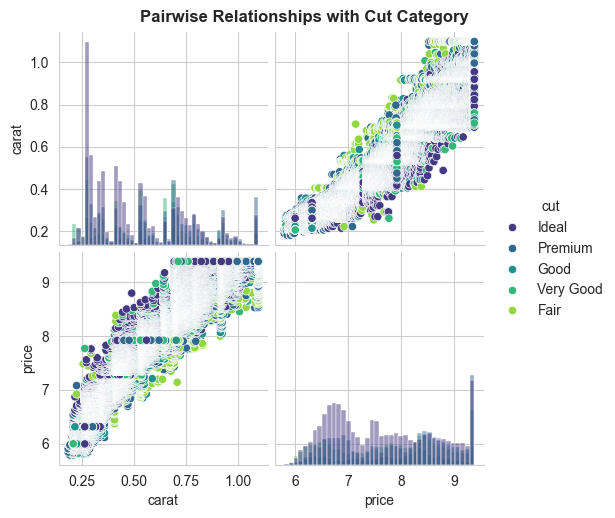

In [34]:
print("Pairwise Relationships")
pairplot_cols = ['carat', 'price', 'cut']
sns.pairplot(df[pairplot_cols], hue='cut', diag_kind='hist', palette='viridis')
plt.suptitle('Pairwise Relationships with Cut Category', y=1.02, fontweight='bold')
plt.show()

Carat vs Price Regression


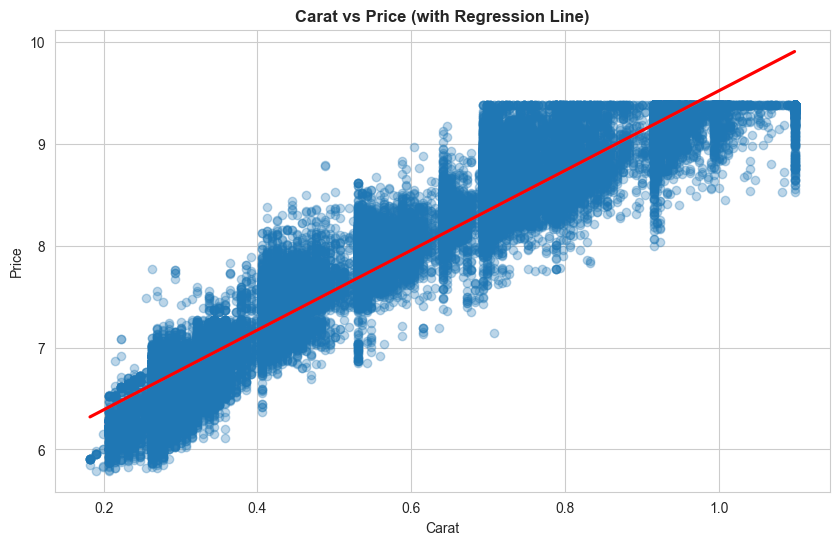

In [35]:
print("Carat vs Price Regression")
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='carat', y='price', scatter_kws={'alpha':0.3}, 
            line_kws={'color': 'red'})
plt.title('Carat vs Price (with Regression Line)', fontweight='bold')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.show()

Average Price per Category


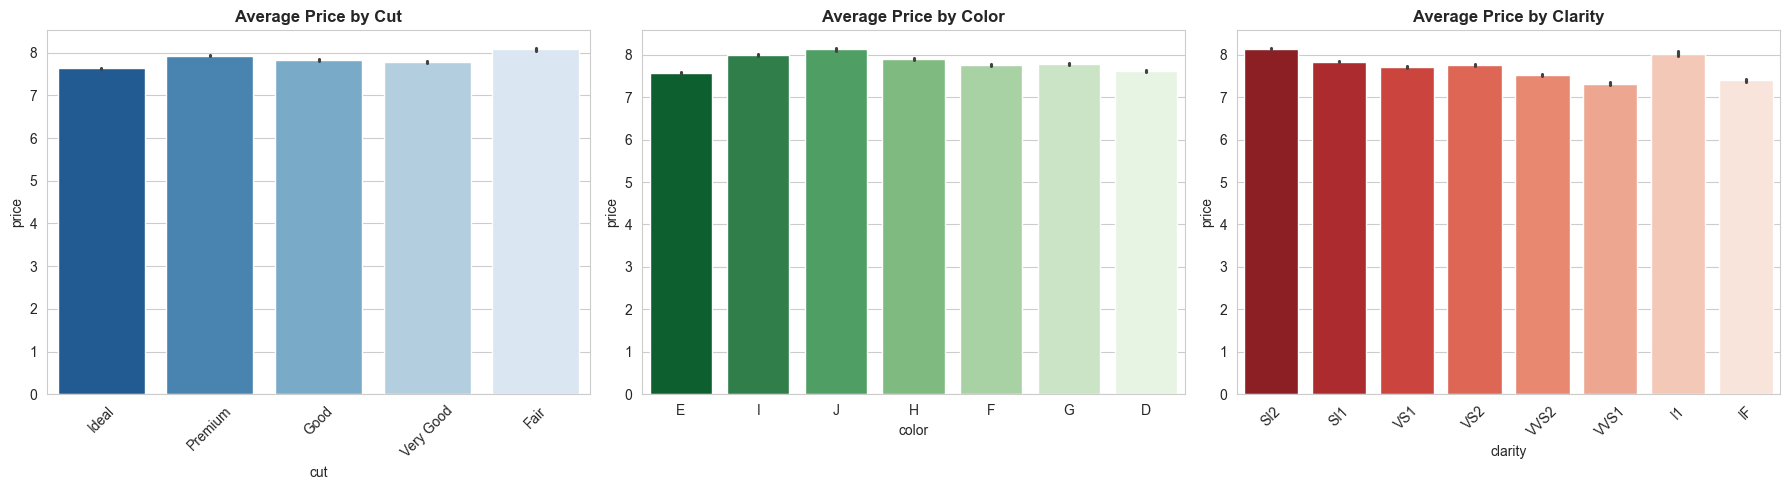

In [36]:
print("Average Price per Category")
plt.figure(figsize=(18, 5))

# Cut
plt.subplot(1, 3, 1)
sns.barplot(data=df, x='cut', y='price', hue='cut', 
            palette='Blues_r', estimator='mean', legend=False)
plt.title('Average Price by Cut', fontweight='bold')
plt.xticks(rotation=45)

# Color
plt.subplot(1, 3, 2)
sns.barplot(data=df, x='color', y='price', hue='color', 
            palette='Greens_r', estimator='mean', legend=False)
plt.title('Average Price by Color', fontweight='bold')

# Clarity
plt.subplot(1, 3, 3)
sns.barplot(data=df, x='clarity', y='price', hue='clarity', 
            palette='Reds_r', estimator='mean', legend=False)
plt.title('Average Price by Clarity', fontweight='bold')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Ordinal Encoding 

In [37]:
cut_order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
color_order = ['J', 'I', 'H', 'G', 'F', 'E', 'D'] 
clarity_order = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF'] 
carat_order = ['Light', 'Medium', 'Heavy']

In [38]:
# (0 = worst, highest number = best)
cut_mapping = {'Fair': 0, 'Good': 1, 'Very Good': 2, 'Premium': 3, 'Ideal': 4}
color_mapping = {'J': 0, 'I': 1, 'H': 2, 'G': 3, 'F': 4, 'E': 5, 'D': 6}
clarity_mapping = {'I1': 0, 'SI2': 1, 'SI1': 2, 'VS2': 3, 'VS1': 4, 'VVS2': 5, 'VVS1': 6, 'IF': 7}
carat_mapping = {'Light': 0, 'Medium': 1, 'Heavy': 2}

In [39]:
df['cut_encoded'] = df['cut'].map(cut_mapping)
df['color_encoded'] = df['color'].map(color_mapping)
df['clarity_encoded'] = df['clarity'].map(clarity_mapping)
df['carat_category_encoded'] = df['carat_category'].map(carat_mapping)

print("Ordinal Encoding Completed")

Ordinal Encoding Completed


C:\Users\mukul\AppData\Local\Temp\ipykernel_16508\2932182449.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cut_encoded'] = df['cut'].map(cut_mapping)
C:\Users\mukul\AppData\Local\Temp\ipykernel_16508\2932182449.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['color_encoded'] = df['color'].map(color_mapping)
C:\Users\mukul\AppData\Local\Temp\ipykernel_16508\2932182449.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

In [40]:
df.columns.tolist()

['carat',
 'cut',
 'color',
 'clarity',
 'price',
 'x',
 'y',
 'z',
 'volume',
 'price_per_carat',
 'dimension_ratio',
 'carat_category',
 'density',
 'table_depth_ratio',
 'size_index',
 'premium_cut_flag',
 'cut_encoded',
 'color_encoded',
 'clarity_encoded',
 'carat_category_encoded']

In [41]:
df.shape

(53794, 20)

In [42]:
# Remove the original categorical columns 

In [43]:
columns_to_drop = ['cut', 'color', 'clarity', 'carat_category']
df = df.drop(columns_to_drop, axis=1)

print(f"Deleted columns: {columns_to_drop}")
print(f"Remaining columns: {df.columns.tolist()}")
print(f"Final dataset shape: {df.shape}")

Deleted columns: ['cut', 'color', 'clarity', 'carat_category']
Remaining columns: ['carat', 'price', 'x', 'y', 'z', 'volume', 'price_per_carat', 'dimension_ratio', 'density', 'table_depth_ratio', 'size_index', 'premium_cut_flag', 'cut_encoded', 'color_encoded', 'clarity_encoded', 'carat_category_encoded']
Final dataset shape: (53794, 16)


In [44]:
df

,carat,price,x,y,z,volume,price_per_carat,dimension_ratio,density,table_depth_ratio,size_index,premium_cut_flag,cut_encoded,color_encoded,clarity_encoded,carat_category_encoded
0,0.207014,5.789960,3.95,3.98,2.43,38.202030,27.968908,1.631687,0.005419,0.894309,3.453333,1,4,5,1,0
1,0.190620,5.789960,3.89,3.84,2.31,34.505856,30.374301,1.673160,0.005524,1.020067,3.346667,1,3,5,2,0
2,0.207014,5.793014,4.05,4.07,2.31,38.076885,27.983657,1.757576,0.005437,1.080851,3.476667,0,1,5,4,0
3,0.254642,5.814131,4.20,4.23,2.63,46.724580,22.832547,1.602662,0.005450,0.929487,3.686667,1,3,1,3,0
4,0.270027,5.817111,4.34,4.35,2.75,51.917250,21.542691,1.580000,0.005201,0.916272,3.813333,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.542324,7.922261,5.75,5.76,3.50,115.920000,14.607978,1.644286,0.004678,0.937500,5.003333,1,4,6,2,1
53936,0.542324,7.922261,5.69,5.75,3.61,118.110175,14.607978,1.584488,0.004592,0.871632,5.016667,0,1,6,2,1
53937,0.530628,7.922261,5.66,5.68,3.56,114.449728,14.929965,1.592697,0.004636,0.955414,4.966667,0,2,6,2,1
53938,0.620576,7.922261,6.15,6.12,3.74,140.766120,12.765970,1.640374,0.004409,0.950820,5.336667,1,3,2,1,1


# Feature Importance

In [45]:
df

,carat,price,x,y,z,volume,price_per_carat,dimension_ratio,density,table_depth_ratio,size_index,premium_cut_flag,cut_encoded,color_encoded,clarity_encoded,carat_category_encoded
0,0.207014,5.789960,3.95,3.98,2.43,38.202030,27.968908,1.631687,0.005419,0.894309,3.453333,1,4,5,1,0
1,0.190620,5.789960,3.89,3.84,2.31,34.505856,30.374301,1.673160,0.005524,1.020067,3.346667,1,3,5,2,0
2,0.207014,5.793014,4.05,4.07,2.31,38.076885,27.983657,1.757576,0.005437,1.080851,3.476667,0,1,5,4,0
3,0.254642,5.814131,4.20,4.23,2.63,46.724580,22.832547,1.602662,0.005450,0.929487,3.686667,1,3,1,3,0
4,0.270027,5.817111,4.34,4.35,2.75,51.917250,21.542691,1.580000,0.005201,0.916272,3.813333,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.542324,7.922261,5.75,5.76,3.50,115.920000,14.607978,1.644286,0.004678,0.937500,5.003333,1,4,6,2,1
53936,0.542324,7.922261,5.69,5.75,3.61,118.110175,14.607978,1.584488,0.004592,0.871632,5.016667,0,1,6,2,1
53937,0.530628,7.922261,5.66,5.68,3.56,114.449728,14.929965,1.592697,0.004636,0.955414,4.966667,0,2,6,2,1
53938,0.620576,7.922261,6.15,6.12,3.74,140.766120,12.765970,1.640374,0.004409,0.950820,5.336667,1,3,2,1,1


In [46]:
# Import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

X = df.drop(columns=['price'])
y = df['price']

# Train The Model 
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Create a Dataframe For Feature Importance 
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
})

# Sort By Importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display Top Features
feature_importance_df

,Feature,Importance
2,y,0.471105
9,size_index,0.341166
0,carat,0.110486
13,clarity_encoded,0.027890
4,volume,0.015507
12,color_encoded,0.011268
1,x,0.010388
5,price_per_carat,0.009791
7,density,0.001012
3,z,0.000484


In [47]:
feature_importance_df["Feature"].to_list()

['y',
 'size_index',
 'carat',
 'clarity_encoded',
 'volume',
 'color_encoded',
 'x',
 'price_per_carat',
 'density',
 'z',
 'dimension_ratio',
 'table_depth_ratio',
 'cut_encoded',
 'premium_cut_flag',
 'carat_category_encoded']

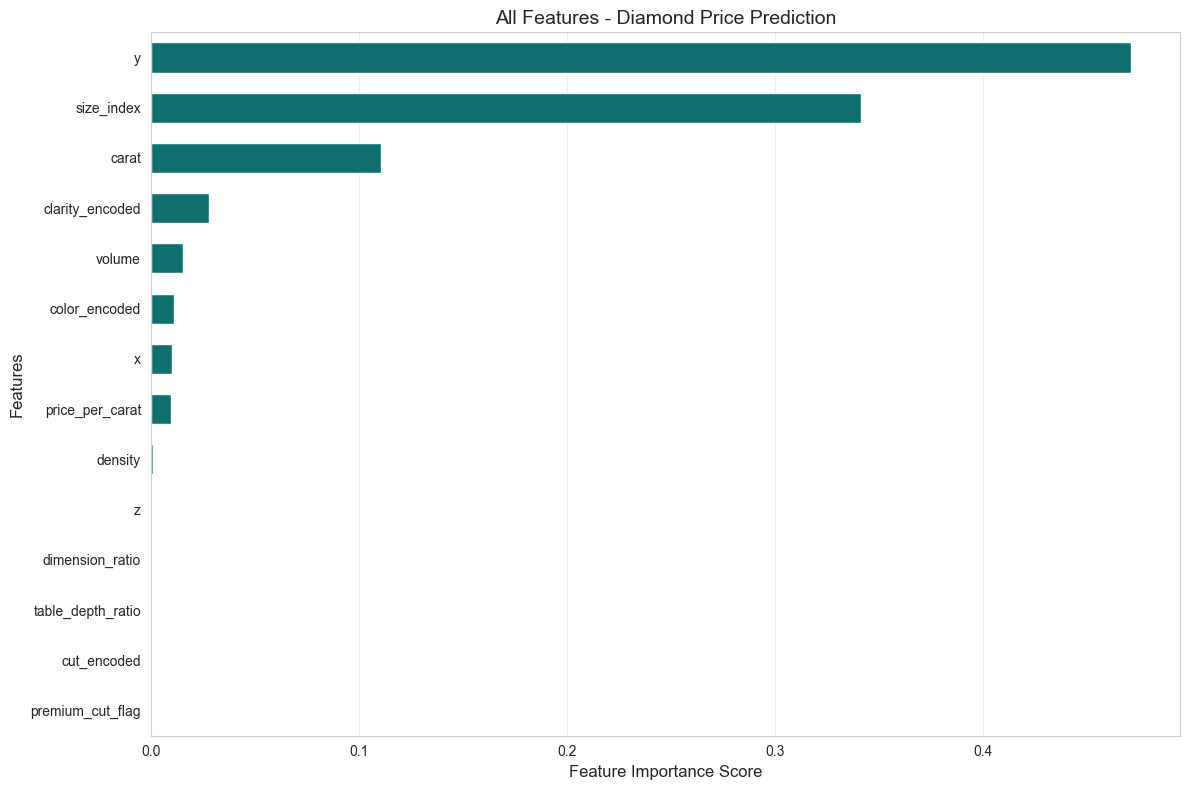

In [48]:
plt.figure(figsize=(12, 8))

sns.barplot(
    x=feature_importance_df['Importance'][:14],  # Importance values
    y=feature_importance_df['Feature'][:14],     # Feature names
    color='teal',                                
    width=0.6                                    
)

plt.xlabel("Feature Importance Score", fontsize=12)
plt.ylabel("Features", fontsize=12)  
plt.title("All Features - Diamond Price Prediction", fontsize=14)
plt.grid(True, axis='x', alpha=0.3)  
plt.tight_layout()                   
plt.show()

In [49]:
df = df.drop(columns = ['carat_category_encoded'])

print(f"New Shape: {df.shape}")
print(f"Remaining Columns: {df.columns.tolist()}")

New Shape: (53794, 15)
Remaining Columns: ['carat', 'price', 'x', 'y', 'z', 'volume', 'price_per_carat', 'dimension_ratio', 'density', 'table_depth_ratio', 'size_index', 'premium_cut_flag', 'cut_encoded', 'color_encoded', 'clarity_encoded']


In [50]:
df

,carat,price,x,y,z,volume,price_per_carat,dimension_ratio,density,table_depth_ratio,size_index,premium_cut_flag,cut_encoded,color_encoded,clarity_encoded
0,0.207014,5.789960,3.95,3.98,2.43,38.202030,27.968908,1.631687,0.005419,0.894309,3.453333,1,4,5,1
1,0.190620,5.789960,3.89,3.84,2.31,34.505856,30.374301,1.673160,0.005524,1.020067,3.346667,1,3,5,2
2,0.207014,5.793014,4.05,4.07,2.31,38.076885,27.983657,1.757576,0.005437,1.080851,3.476667,0,1,5,4
3,0.254642,5.814131,4.20,4.23,2.63,46.724580,22.832547,1.602662,0.005450,0.929487,3.686667,1,3,1,3
4,0.270027,5.817111,4.34,4.35,2.75,51.917250,21.542691,1.580000,0.005201,0.916272,3.813333,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.542324,7.922261,5.75,5.76,3.50,115.920000,14.607978,1.644286,0.004678,0.937500,5.003333,1,4,6,2
53936,0.542324,7.922261,5.69,5.75,3.61,118.110175,14.607978,1.584488,0.004592,0.871632,5.016667,0,1,6,2
53937,0.530628,7.922261,5.66,5.68,3.56,114.449728,14.929965,1.592697,0.004636,0.955414,4.966667,0,2,6,2
53938,0.620576,7.922261,6.15,6.12,3.74,140.766120,12.765970,1.640374,0.004409,0.950820,5.336667,1,3,2,1


# Model Building

In [51]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import pickle

# Building ML Regression models

In [52]:
# Separate the features and target column
X = df.drop(columns = ['price'])
y = df['price']

# Split data
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 42,)

print(f"Training set: {X_train.shape}")
print(f"Testing set: {X_test.shape}")
print(f"Total features: {X_train.shape[1]}")

# Ml Regression models
print("Building ML Regression Models")

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "KNN": KNeighborsRegressor(n_neighbors=5),
    "XGBoost": XGBRegressor(random_state=42)
}

# Create an empty dictonary to store results
ml_results = {}

print("\nTraining ML Models...")
for name, model in models.items():
    print(f"\nTraining {name}")
    
    # Train model
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Store results
    ml_results[name] = {
        'MAE': round(mae, 4),
        'MSE': round(mse, 4),
        'RMSE': round(rmse, 4),
        'R²': round(r2, 4)
    }
    
    # Print results
    print(f"   MAE:  {mae:.4f}")
    print(f"   MSE:  {mse:.4f}")
    print(f"   RMSE: {rmse:.4f}")
    print(f"   R²:   {r2:.4f}")

Training set: (43035, 14)
Testing set: (10759, 14)
Total features: 14
Building ML Regression Models

Training ML Models...

Training Linear Regression
   MAE:  0.0903
   MSE:  0.0149
   RMSE: 0.1221
   R²:   0.9844

Training Random Forest
   MAE:  0.0250
   MSE:  0.0024
   RMSE: 0.0493
   R²:   0.9975

Training Decision Tree
   MAE:  0.0348
   MSE:  0.0056
   RMSE: 0.0751
   R²:   0.9941

Training KNN
   MAE:  0.0676
   MSE:  0.0104
   RMSE: 0.1020
   R²:   0.9891

Training XGBoost
   MAE:  0.0343
   MSE:  0.0025
   RMSE: 0.0497
   R²:   0.9974


# Building ANN Regression Model

In [53]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
import numpy as np

print("\nTraining ANN Model...")

X_train_np = X_train.to_numpy(dtype=np.float32)
X_test_np  = X_test.to_numpy(dtype=np.float32)

y_train_np = y_train.to_numpy(dtype=np.float32) 
y_test_np  = y_test.to_numpy(dtype=np.float32)

# Convert to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train_np)
X_test_tensor = torch.FloatTensor(X_test_np)
y_train_tensor = torch.FloatTensor(y_train_np)
y_test_tensor = torch.FloatTensor(y_test_np)

class SimpleANN(nn.Module):
    def __init__(self, input_size):
        super(SimpleANN, self).__init__()

        # Hidden layers
        self.fc1 = nn.Linear(input_size, 32)   # Hidden layer 1
        self.fc2 = nn.Linear(32, 64)           # Hidden layer 2
        self.fc3 = nn.Linear(64, 16)           # Hidden layer 3

        # Output layer
        self.output = nn.Linear(16, 1)

        # Activation
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))   # pass through hidden layer 1
        x = self.relu(self.fc2(x))   # pass through hidden layer 2
        x = self.relu(self.fc3(x))   # pass through hidden layer 3
        x = self.output(x)           # output layer
        return x

# Initialize model
ann_model = SimpleANN(X_train.shape[1])

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(ann_model.parameters(), lr=0.001)

# Training
epochs = 50  # More epochs
print("Training...")
for epoch in range(epochs):
    outputs = ann_model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 10 == 0:
        print(f'   Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.6f}')

# Predictions
with torch.no_grad():
    ann_model.eval()
    y_pred_ann = ann_model(X_test_tensor).numpy()

# Calculate metrics
mae_ann = mean_absolute_error(y_test, y_pred_ann)
mse_ann = mean_squared_error(y_test, y_pred_ann)
rmse_ann = np.sqrt(mse_ann)
r2_ann = r2_score(y_test, y_pred_ann)

print(f"\nANN Results:")
print(f"   MAE:  {mae_ann:.4f}")
print(f"   MSE:  {mse_ann:.4f}")
print(f"   RMSE: {rmse_ann:.4f}")
print(f"   R²:   {r2_ann:.4f}")

ml_results['ANN'] = {
    'MAE': round(mae_ann, 4),
    'MSE': round(mse_ann, 4),
    'RMSE': round(rmse_ann, 4),
    'R²': round(r2_ann, 4)
}


Training ANN Model...
Training...


C:\Users\mukul\AppData\Local\Programs\Python\Python313\Lib\site-packages\torch\nn\modules\loss.py:634: UserWarning: Using a target size (torch.Size([43035])) that is different to the input size (torch.Size([43035, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


   Epoch [10/50], Loss: 45.137119
   Epoch [20/50], Loss: 16.081192
   Epoch [30/50], Loss: 15.112978
   Epoch [40/50], Loss: 10.573499
   Epoch [50/50], Loss: 8.563632

ANN Results:
   MAE:  1.8077
   MSE:  3.9934
   RMSE: 1.9983
   R²:   -3.1841


# Model Comparison

In [54]:
print("FINAL MODEL COMPARISON")

# Create comparison dataframe
import pandas as pd
results_df = pd.DataFrame(ml_results).T.sort_values('R²', ascending=False)

print(results_df.round(4))

# Find best model
best_model_name = results_df['R²'].idxmax()
best_score = results_df.loc[best_model_name, 'R²']
print(f"\nBEST PERFORMING MODEL: {best_model_name}")
print(f"   R² Score: {best_score:.4f}")

# Save best model
import pickle

if best_model_name != 'ANN': 
    # Save the ML Model
    best_model = models[best_model_name] 
    with open('best_regression_model.pkl', 'wb') as file:
        pickle.dump(best_model, file)
    print(f"Best model ({best_model_name}) saved as 'best_regression_model.pkl'")
else:  
    print(f"Best model is ANN, saving Random Forest for practical deployment")
    # Save Random Forest as practical alternative
    with open('best_regression_model.pkl', 'wb') as file:
        pickle.dump(models['Random Forest'], file)
    print("Random Forest saved as 'best_regression_model.pkl'")

FINAL MODEL COMPARISON
                      MAE     MSE    RMSE      R²
Random Forest      0.0250  0.0024  0.0493  0.9975
XGBoost            0.0343  0.0025  0.0497  0.9974
Decision Tree      0.0348  0.0056  0.0751  0.9941
KNN                0.0676  0.0104  0.1020  0.9891
Linear Regression  0.0903  0.0149  0.1221  0.9844
ANN                1.8077  3.9934  1.9983 -3.1841

BEST PERFORMING MODEL: Random Forest
   R² Score: 0.9975
Best model (Random Forest) saved as 'best_regression_model.pkl'


# Clustering (Market Segmentation)

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import pickle

In [56]:
df.head()

,carat,price,x,y,z,volume,price_per_carat,dimension_ratio,density,table_depth_ratio,size_index,premium_cut_flag,cut_encoded,color_encoded,clarity_encoded
0,0.207014,5.789960,3.95,3.98,2.43,38.202030,27.968908,1.631687,0.005419,0.894309,3.453333,1,4,5,1
1,0.190620,5.789960,3.89,3.84,2.31,34.505856,30.374301,1.673160,0.005524,1.020067,3.346667,1,3,5,2
2,0.207014,5.793014,4.05,4.07,2.31,38.076885,27.983657,1.757576,0.005437,1.080851,3.476667,0,1,5,4
3,0.254642,5.814131,4.20,4.23,2.63,46.724580,22.832547,1.602662,0.005450,0.929487,3.686667,1,3,1,3
4,0.270027,5.817111,4.34,4.35,2.75,51.917250,21.542691,1.580000,0.005201,0.916272,3.813333,0,1,0,1


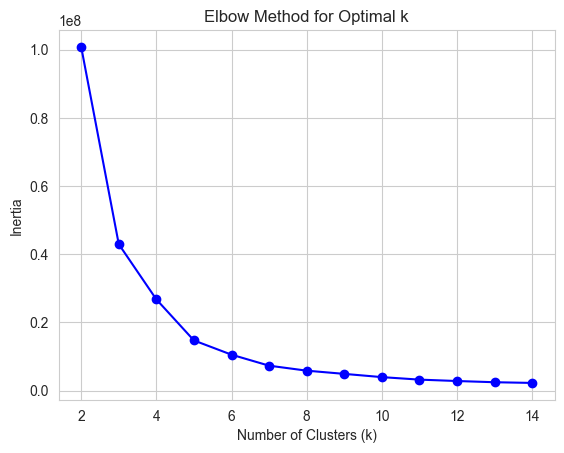

In [57]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertia = []
K = range(2, 15)  # trying clusters from 2 to 10

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

# Plot
plt.plot(K, inertia, 'bo-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()


In [58]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)  # use elbow result
labels_kmeans = kmeans.fit_predict(df)

In [59]:
from sklearn.metrics import silhouette_score
print("KMeans Silhouette:", silhouette_score(df, labels_kmeans))

KMeans Silhouette: 0.6179300648971997


In [60]:
import pickle 
with open('clustering_model.pkl','wb') as file:
    pickle.dump(kmeans,file)

In [61]:
df['cluster']=kmeans.labels_

In [62]:
df

,carat,price,x,y,z,volume,price_per_carat,dimension_ratio,density,table_depth_ratio,size_index,premium_cut_flag,cut_encoded,color_encoded,clarity_encoded,cluster
0,0.207014,5.789960,3.95,3.98,2.43,38.202030,27.968908,1.631687,0.005419,0.894309,3.453333,1,4,5,1,4
1,0.190620,5.789960,3.89,3.84,2.31,34.505856,30.374301,1.673160,0.005524,1.020067,3.346667,1,3,5,2,4
2,0.207014,5.793014,4.05,4.07,2.31,38.076885,27.983657,1.757576,0.005437,1.080851,3.476667,0,1,5,4,4
3,0.254642,5.814131,4.20,4.23,2.63,46.724580,22.832547,1.602662,0.005450,0.929487,3.686667,1,3,1,3,4
4,0.270027,5.817111,4.34,4.35,2.75,51.917250,21.542691,1.580000,0.005201,0.916272,3.813333,0,1,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.542324,7.922261,5.75,5.76,3.50,115.920000,14.607978,1.644286,0.004678,0.937500,5.003333,1,4,6,2,0
53936,0.542324,7.922261,5.69,5.75,3.61,118.110175,14.607978,1.584488,0.004592,0.871632,5.016667,0,1,6,2,0
53937,0.530628,7.922261,5.66,5.68,3.56,114.449728,14.929965,1.592697,0.004636,0.955414,4.966667,0,2,6,2,0
53938,0.620576,7.922261,6.15,6.12,3.74,140.766120,12.765970,1.640374,0.004409,0.950820,5.336667,1,3,2,1,2


In [63]:
df.groupby('cluster').mean()

,carat,price,x,y,z,volume,price_per_carat,dimension_ratio,density,table_depth_ratio,size_index,premium_cut_flag,cut_encoded,color_encoded,clarity_encoded
cluster,,,,,,,,,,,,,,,
0,0.489578,7.645992,5.502921,5.509725,3.394872,103.749759,15.815741,1.623691,0.004743,0.928674,4.802506,0.649515,2.952537,3.728121,3.023589
1,0.920366,9.134337,7.353475,7.344979,4.536952,245.527179,9.947857,1.620458,0.003757,0.939271,6.411802,0.652902,2.789443,2.598559,2.608687
2,0.715732,8.558287,6.497622,6.493645,4.016421,170.040235,12.001152,1.617790,0.004225,0.936834,5.669229,0.589397,2.677868,3.227213,2.475070
3,1.095963,9.352686,8.216031,8.194785,5.067561,341.998491,8.534733,1.619990,0.003228,0.943943,7.159459,0.619069,2.623503,1.849224,1.690466
4,0.296808,6.637744,4.500404,4.509765,2.778060,56.847590,22.728838,1.623336,0.005289,0.923553,3.929409,0.718300,3.120054,3.729036,3.847460


In [64]:
# Define mapping dictonary 
cluster_labels = {
    0: "Mid-Range Balanced Diamonds",
    1: "Premium Large Diamonds",       
    2: "Standard Quality Diamonds",    
    3: "Luxury Large Diamonds",        
    4: "Small Budget Diamonds" 
}
# Map the cluster labels
df['cluster_name'] = df['cluster'].map(cluster_labels)

# Display the result 
df


,carat,price,x,y,z,volume,price_per_carat,dimension_ratio,density,table_depth_ratio,size_index,premium_cut_flag,cut_encoded,color_encoded,clarity_encoded,cluster,cluster_name
0,0.207014,5.789960,3.95,3.98,2.43,38.202030,27.968908,1.631687,0.005419,0.894309,3.453333,1,4,5,1,4,Small Budget Diamonds
1,0.190620,5.789960,3.89,3.84,2.31,34.505856,30.374301,1.673160,0.005524,1.020067,3.346667,1,3,5,2,4,Small Budget Diamonds
2,0.207014,5.793014,4.05,4.07,2.31,38.076885,27.983657,1.757576,0.005437,1.080851,3.476667,0,1,5,4,4,Small Budget Diamonds
3,0.254642,5.814131,4.20,4.23,2.63,46.724580,22.832547,1.602662,0.005450,0.929487,3.686667,1,3,1,3,4,Small Budget Diamonds
4,0.270027,5.817111,4.34,4.35,2.75,51.917250,21.542691,1.580000,0.005201,0.916272,3.813333,0,1,0,1,4,Small Budget Diamonds
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.542324,7.922261,5.75,5.76,3.50,115.920000,14.607978,1.644286,0.004678,0.937500,5.003333,1,4,6,2,0,Mid-Range Balanced Diamonds
53936,0.542324,7.922261,5.69,5.75,3.61,118.110175,14.607978,1.584488,0.004592,0.871632,5.016667,0,1,6,2,0,Mid-Range Balanced Diamonds
53937,0.530628,7.922261,5.66,5.68,3.56,114.449728,14.929965,1.592697,0.004636,0.955414,4.966667,0,2,6,2,0,Mid-Range Balanced Diamonds
53938,0.620576,7.922261,6.15,6.12,3.74,140.766120,12.765970,1.640374,0.004409,0.950820,5.336667,1,3,2,1,2,Standard Quality Diamonds
